# Business Problem Understanding or Project Understanding
 * predict whether the student is Placed for a job or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('CollegePlacement.csv')

In [3]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


# DATA EXPLORATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [5]:
df['College_ID'].unique()

array(['CLG0030', 'CLG0061', 'CLG0036', 'CLG0055', 'CLG0004', 'CLG0015',
       'CLG0071', 'CLG0096', 'CLG0097', 'CLG0057', 'CLG0063', 'CLG0077',
       'CLG0064', 'CLG0017', 'CLG0053', 'CLG0040', 'CLG0070', 'CLG0050',
       'CLG0068', 'CLG0072', 'CLG0034', 'CLG0087', 'CLG0073', 'CLG0024',
       'CLG0008', 'CLG0025', 'CLG0018', 'CLG0014', 'CLG0006', 'CLG0082',
       'CLG0090', 'CLG0075', 'CLG0094', 'CLG0089', 'CLG0016', 'CLG0076',
       'CLG0047', 'CLG0054', 'CLG0058', 'CLG0100', 'CLG0046', 'CLG0001',
       'CLG0041', 'CLG0093', 'CLG0027', 'CLG0062', 'CLG0081', 'CLG0028',
       'CLG0020', 'CLG0051', 'CLG0069', 'CLG0088', 'CLG0038', 'CLG0029',
       'CLG0035', 'CLG0019', 'CLG0005', 'CLG0026', 'CLG0066', 'CLG0045',
       'CLG0043', 'CLG0074', 'CLG0048', 'CLG0012', 'CLG0099', 'CLG0011',
       'CLG0091', 'CLG0083', 'CLG0080', 'CLG0044', 'CLG0059', 'CLG0031',
       'CLG0039', 'CLG0065', 'CLG0079', 'CLG0095', 'CLG0085', 'CLG0033',
       'CLG0007', 'CLG0037', 'CLG0032', 'CLG0049', 

In [6]:
df['College_ID'].value_counts()

College_ID
CLG0062    133
CLG0027    120
CLG0075    119
CLG0065    119
CLG0023    118
          ... 
CLG0006     83
CLG0060     83
CLG0035     83
CLG0054     79
CLG0042     75
Name: count, Length: 100, dtype: int64

In [7]:
df['IQ'].unique()

array([107,  97, 109, 122,  96, 123, 111,  92, 108,  93, 103,  71,  74,
        91,  84, 104,  86,  78, 121, 101,  82, 105,  90,  95, 127,  99,
       112,  81,  70,  80, 102,  98,  77,  89, 115,  73,  94, 113,  87,
       114,  83, 120,  60, 100, 106, 128, 136, 117, 132,  85,  76,  88,
       119,  75, 140, 110, 116,  79, 157, 134,  69, 126, 131,  51, 124,
        68, 118, 130, 129,  65, 146, 125,  72,  62,  66,  59, 138, 139,
       137,  67,  63,  57,  56, 133,  61,  64, 147,  55,  54, 141, 135,
       144,  58, 158, 143, 148, 142,  52, 152,  44,  45,  42, 150,  41])

In [8]:
df['Prev_Sem_Result'].unique()

array([ 6.61,  5.52,  5.36,  5.47,  7.91,  5.26,  6.68,  8.77,  6.47,
        8.82,  8.73,  6.23,  8.64,  8.74,  6.99,  6.05,  7.61,  9.61,
        8.2 ,  5.86,  8.41,  7.14,  7.96,  8.67,  7.57,  9.07,  8.61,
        8.08,  5.75,  9.18,  9.68,  5.68,  7.44,  6.29,  5.7 ,  9.39,
        5.9 ,  8.99,  7.28,  6.64,  5.79,  5.84,  8.31,  7.75,  5.61,
        5.56,  8.72,  8.56,  5.29,  7.8 ,  5.42,  9.52,  9.54,  8.49,
        9.63,  9.06,  9.14,  7.85,  6.53,  6.09,  8.14,  7.34,  6.17,
        7.94,  9.62,  8.33,  5.93,  9.47,  6.24,  5.46,  8.75,  5.88,
        6.86,  5.14,  5.69,  5.87,  5.27,  8.28,  9.19,  6.87,  9.37,
        6.07,  6.63,  8.1 ,  7.1 ,  8.07,  8.81,  7.73,  6.5 ,  6.8 ,
        8.59,  8.06,  5.89,  6.88,  7.41,  8.4 ,  9.49,  6.25,  7.71,
        9.  ,  5.18,  9.92,  7.27,  6.46,  8.96,  9.78,  7.07,  9.76,
        9.12,  8.37,  7.17,  7.79,  8.48,  9.09,  6.19,  6.62,  7.98,
        6.44,  6.49,  5.28,  5.01,  5.51,  9.81,  7.13,  7.56,  5.73,
        7.76,  5.72,

In [9]:
df['CGPA'].unique()

array([ 6.28,  5.37,  5.83,  5.75,  7.69,  5.32,  6.58,  8.76,  6.33,
        8.6 ,  8.9 ,  6.51,  9.01,  8.4 ,  7.31,  5.8 ,  7.54, 10.01,
        8.15,  5.56,  8.07,  7.11,  8.22,  9.17,  7.86,  9.45,  8.86,
        8.48,  5.33,  9.61,  9.58,  6.1 ,  7.02,  9.11,  5.97,  9.27,
        5.96,  6.98,  6.39,  5.51,  5.89,  8.72,  8.16,  5.16,  5.14,
        5.11,  5.18,  7.89,  5.5 ,  9.56,  9.38,  8.7 ,  9.96,  8.91,
        8.73,  7.65,  6.17,  6.06,  6.3 ,  8.1 ,  5.58,  6.53,  6.87,
        6.22,  7.61,  9.12,  8.5 ,  7.51,  7.6 ,  6.04,  9.44,  6.16,
        5.85,  5.78,  6.69,  5.41,  6.11,  5.57,  8.77,  9.39,  7.12,
        9.85,  6.76,  5.99,  8.52,  7.48,  8.41,  9.26,  7.77,  9.19,
        6.54,  6.74,  8.54,  7.96,  6.31,  7.7 ,  7.5 ,  9.57,  9.07,
        7.62,  8.23,  9.09,  5.44,  5.88, 10.37,  7.46,  7.23,  8.87,
        9.6 ,  7.42, 10.17,  6.92,  8.66,  6.96,  7.3 ,  5.59,  5.45,
        9.5 ,  9.16,  6.19,  6.41,  7.22,  8.28,  6.08,  5.25,  4.97,
        5.66,  8.93,

In [10]:
df['Academic_Performance'].unique()

array([ 8,  9,  6,  7,  5,  4,  2,  3, 10,  1])

In [11]:
df['Internship_Experience'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['Extra_Curricular_Score'].unique()

array([ 8,  7,  3,  1,  5,  0,  4,  9,  2, 10,  6])

In [13]:
df['Communication_Skills'].unique()

array([ 8,  1,  6, 10,  9,  7,  5,  2,  3,  4])

In [14]:
df['Projects_Completed'].unique()

array([4, 0, 1, 2, 5, 3])

In [15]:
df['Placement'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

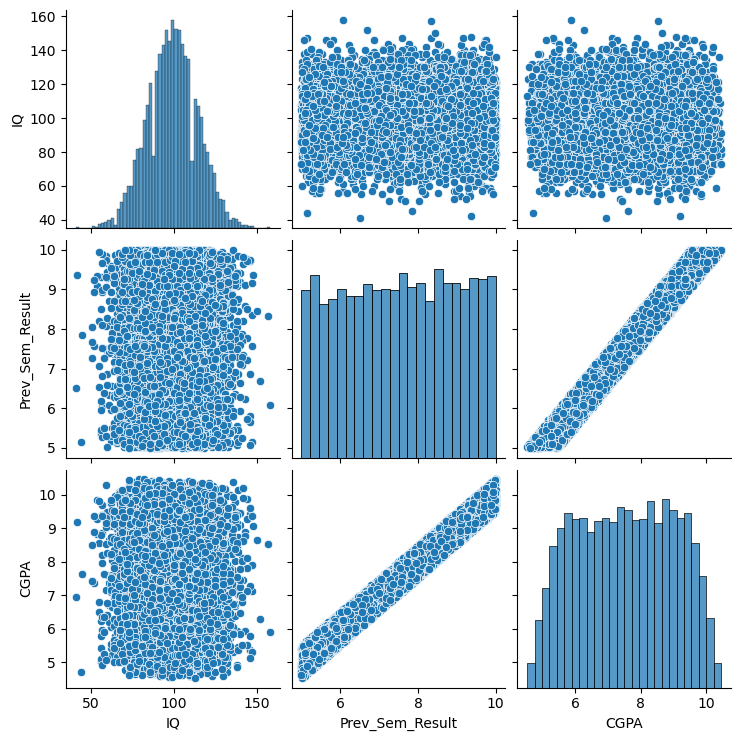

In [18]:
sns.pairplot(df,vars=['IQ','Prev_Sem_Result','CGPA'])
plt.show()

In [19]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


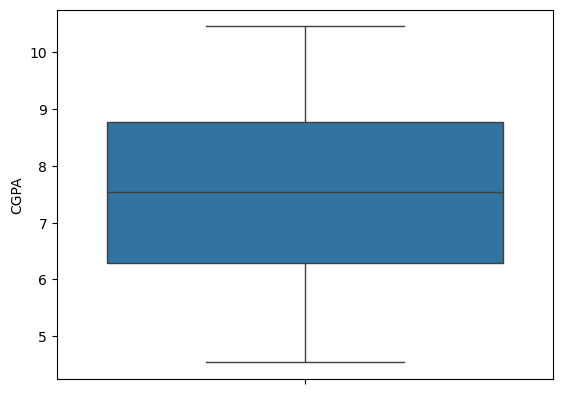

In [20]:
sns.boxplot(df['CGPA'])
plt.show()

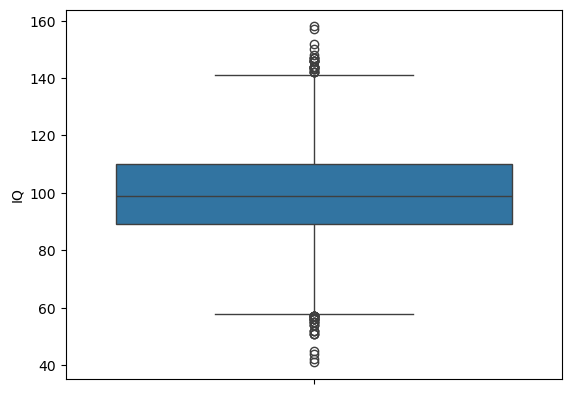

In [21]:
sns.boxplot(df['IQ'])
plt.show()

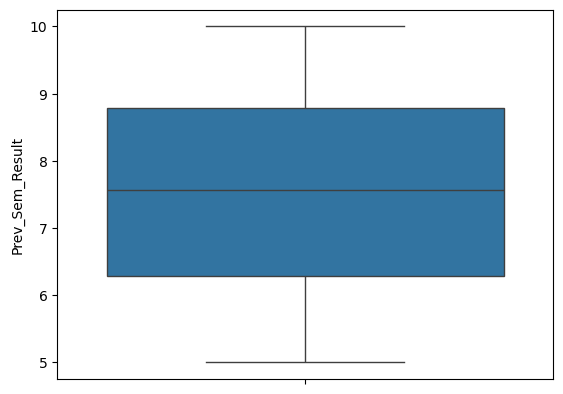

In [22]:
sns.boxplot(df['Prev_Sem_Result'])
plt.show()

# DATA CLEANING

In [23]:
df.drop('College_ID',inplace=True,axis=1)

In [24]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes
9996,70,9.25,9.34,7,No,0,7,2,No
9997,89,6.08,6.25,3,Yes,3,9,5,No
9998,107,8.77,8.92,3,No,7,5,1,No


# ENCODING

In [25]:
df=pd.get_dummies(df,columns=['Internship_Experience','Placement'],drop_first=True).astype(int)

In [26]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience_Yes,Placement_Yes
0,107,6,6,8,8,8,4,0,0
1,97,5,5,8,7,8,0,0,0
2,109,5,5,9,3,1,1,0,0
3,122,5,5,6,1,6,1,1,0
4,96,7,7,7,8,10,2,0,0
...,...,...,...,...,...,...,...,...,...
9995,119,8,8,4,1,8,0,0,1
9996,70,9,9,7,0,7,2,0,0
9997,89,6,6,3,3,9,5,1,0
9998,107,8,8,3,7,5,1,0,0


In [27]:
df.skew()

IQ                           0.000698
Prev_Sem_Result             -0.032593
CGPA                        -0.033273
Academic_Performance        -0.016208
Extra_Curricular_Score       0.010220
Communication_Skills        -0.014202
Projects_Completed          -0.013623
Internship_Experience_Yes    0.423656
Placement_Yes                1.796550
dtype: float64

# SCALLING

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[['IQ']]=ss.fit_transform(df[['IQ']])

In [29]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience_Yes,Placement_Yes
0,0.500135,6,6,8,8,8,4,0,0
1,-0.164214,5,5,8,7,8,0,0,0
2,0.633004,5,5,9,3,1,1,0,0
3,1.496657,5,5,6,1,6,1,1,0
4,-0.230648,7,7,7,8,10,2,0,0
...,...,...,...,...,...,...,...,...,...
9995,1.297352,8,8,4,1,8,0,0,1
9996,-1.957954,9,9,7,0,7,2,0,0
9997,-0.695692,6,6,3,3,9,5,1,0
9998,0.500135,8,8,3,7,5,1,0,0


# CORELATION

In [30]:
df.corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience_Yes,Placement_Yes
IQ,1.000000,-0.002694,-0.000653,-0.006827,-0.003458,-0.010896,0.014538,-0.000247,0.285914
Prev_Sem_Result,-0.002694,1.000000,0.944628,-0.006654,0.007745,-0.018685,0.018126,-0.009665,0.316158
CGPA,-0.000653,0.944628,1.000000,-0.003345,0.008870,-0.014425,0.022250,-0.011762,0.324266
Academic_Performance,-0.006827,-0.006654,-0.003345,1.000000,0.011774,-0.019733,-0.013148,0.025903,-0.014920
Extra_Curricular_Score,-0.003458,0.007745,0.008870,0.011774,1.000000,0.003769,0.008122,0.002093,-0.004740
Communication_Skills,-0.010896,-0.018685,-0.014425,-0.019733,0.003769,1.000000,-0.004486,-0.020437,0.323155
Projects_Completed,0.014538,0.018126,0.022250,-0.013148,0.008122,-0.004486,1.000000,-0.010260,0.217499
Internship_Experience_Yes,-0.000247,-0.009665,-0.011762,0.025903,0.002093,-0.020437,-0.010260,1.000000,-0.005841
Placement_Yes,0.285914,0.316158,0.324266,-0.014920,-0.004740,0.323155,0.217499,-0.005841,1.000000


In [31]:
df.drop(columns='Extra_Curricular_Score',inplace=True,axis=1)

In [32]:
df.to_csv("cleaned_CollegePlacement.csv",index=False)

# LOAD THE CLEANED DATA

In [33]:
df=pd.read_csv('cleaned_CollegePlacement.csv')

In [34]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Communication_Skills,Projects_Completed,Internship_Experience_Yes,Placement_Yes
0,0.500135,6,6,8,8,4,0,0
1,-0.164214,5,5,8,8,0,0,0
2,0.633004,5,5,9,1,1,0,0
3,1.496657,5,5,6,6,1,1,0
4,-0.230648,7,7,7,10,2,0,0
...,...,...,...,...,...,...,...,...
9995,1.297352,8,8,4,8,0,0,1
9996,-1.957954,9,9,7,7,2,0,0
9997,-0.695692,6,6,3,9,5,1,0
9998,0.500135,8,8,3,5,1,0,0


In [35]:
x=df.drop('Placement_Yes',axis=1)
y=df['Placement_Yes']

# RANDOM STATE NUMBER

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
train=[]
cv=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    ypred_train=lg.predict(x_train)
    Train=accuracy_score(y_train,ypred_train)
    CV=cross_val_score(lg,x_train,y_train,cv=5,scoring='accuracy').mean()
    train.append(Train)
    cv.append(CV)

In [37]:
df1=pd.DataFrame({'Train':train,'CV':cv})
df2=df1[df1['Train']-df1['CV']<=0.5]
df2[df2['CV']==df2['CV'].max()]

,Train,CV
35,0.909125,0.909
95,0.909375,0.909


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=35)

# MODEL SELECTION
   # DECISION TREE

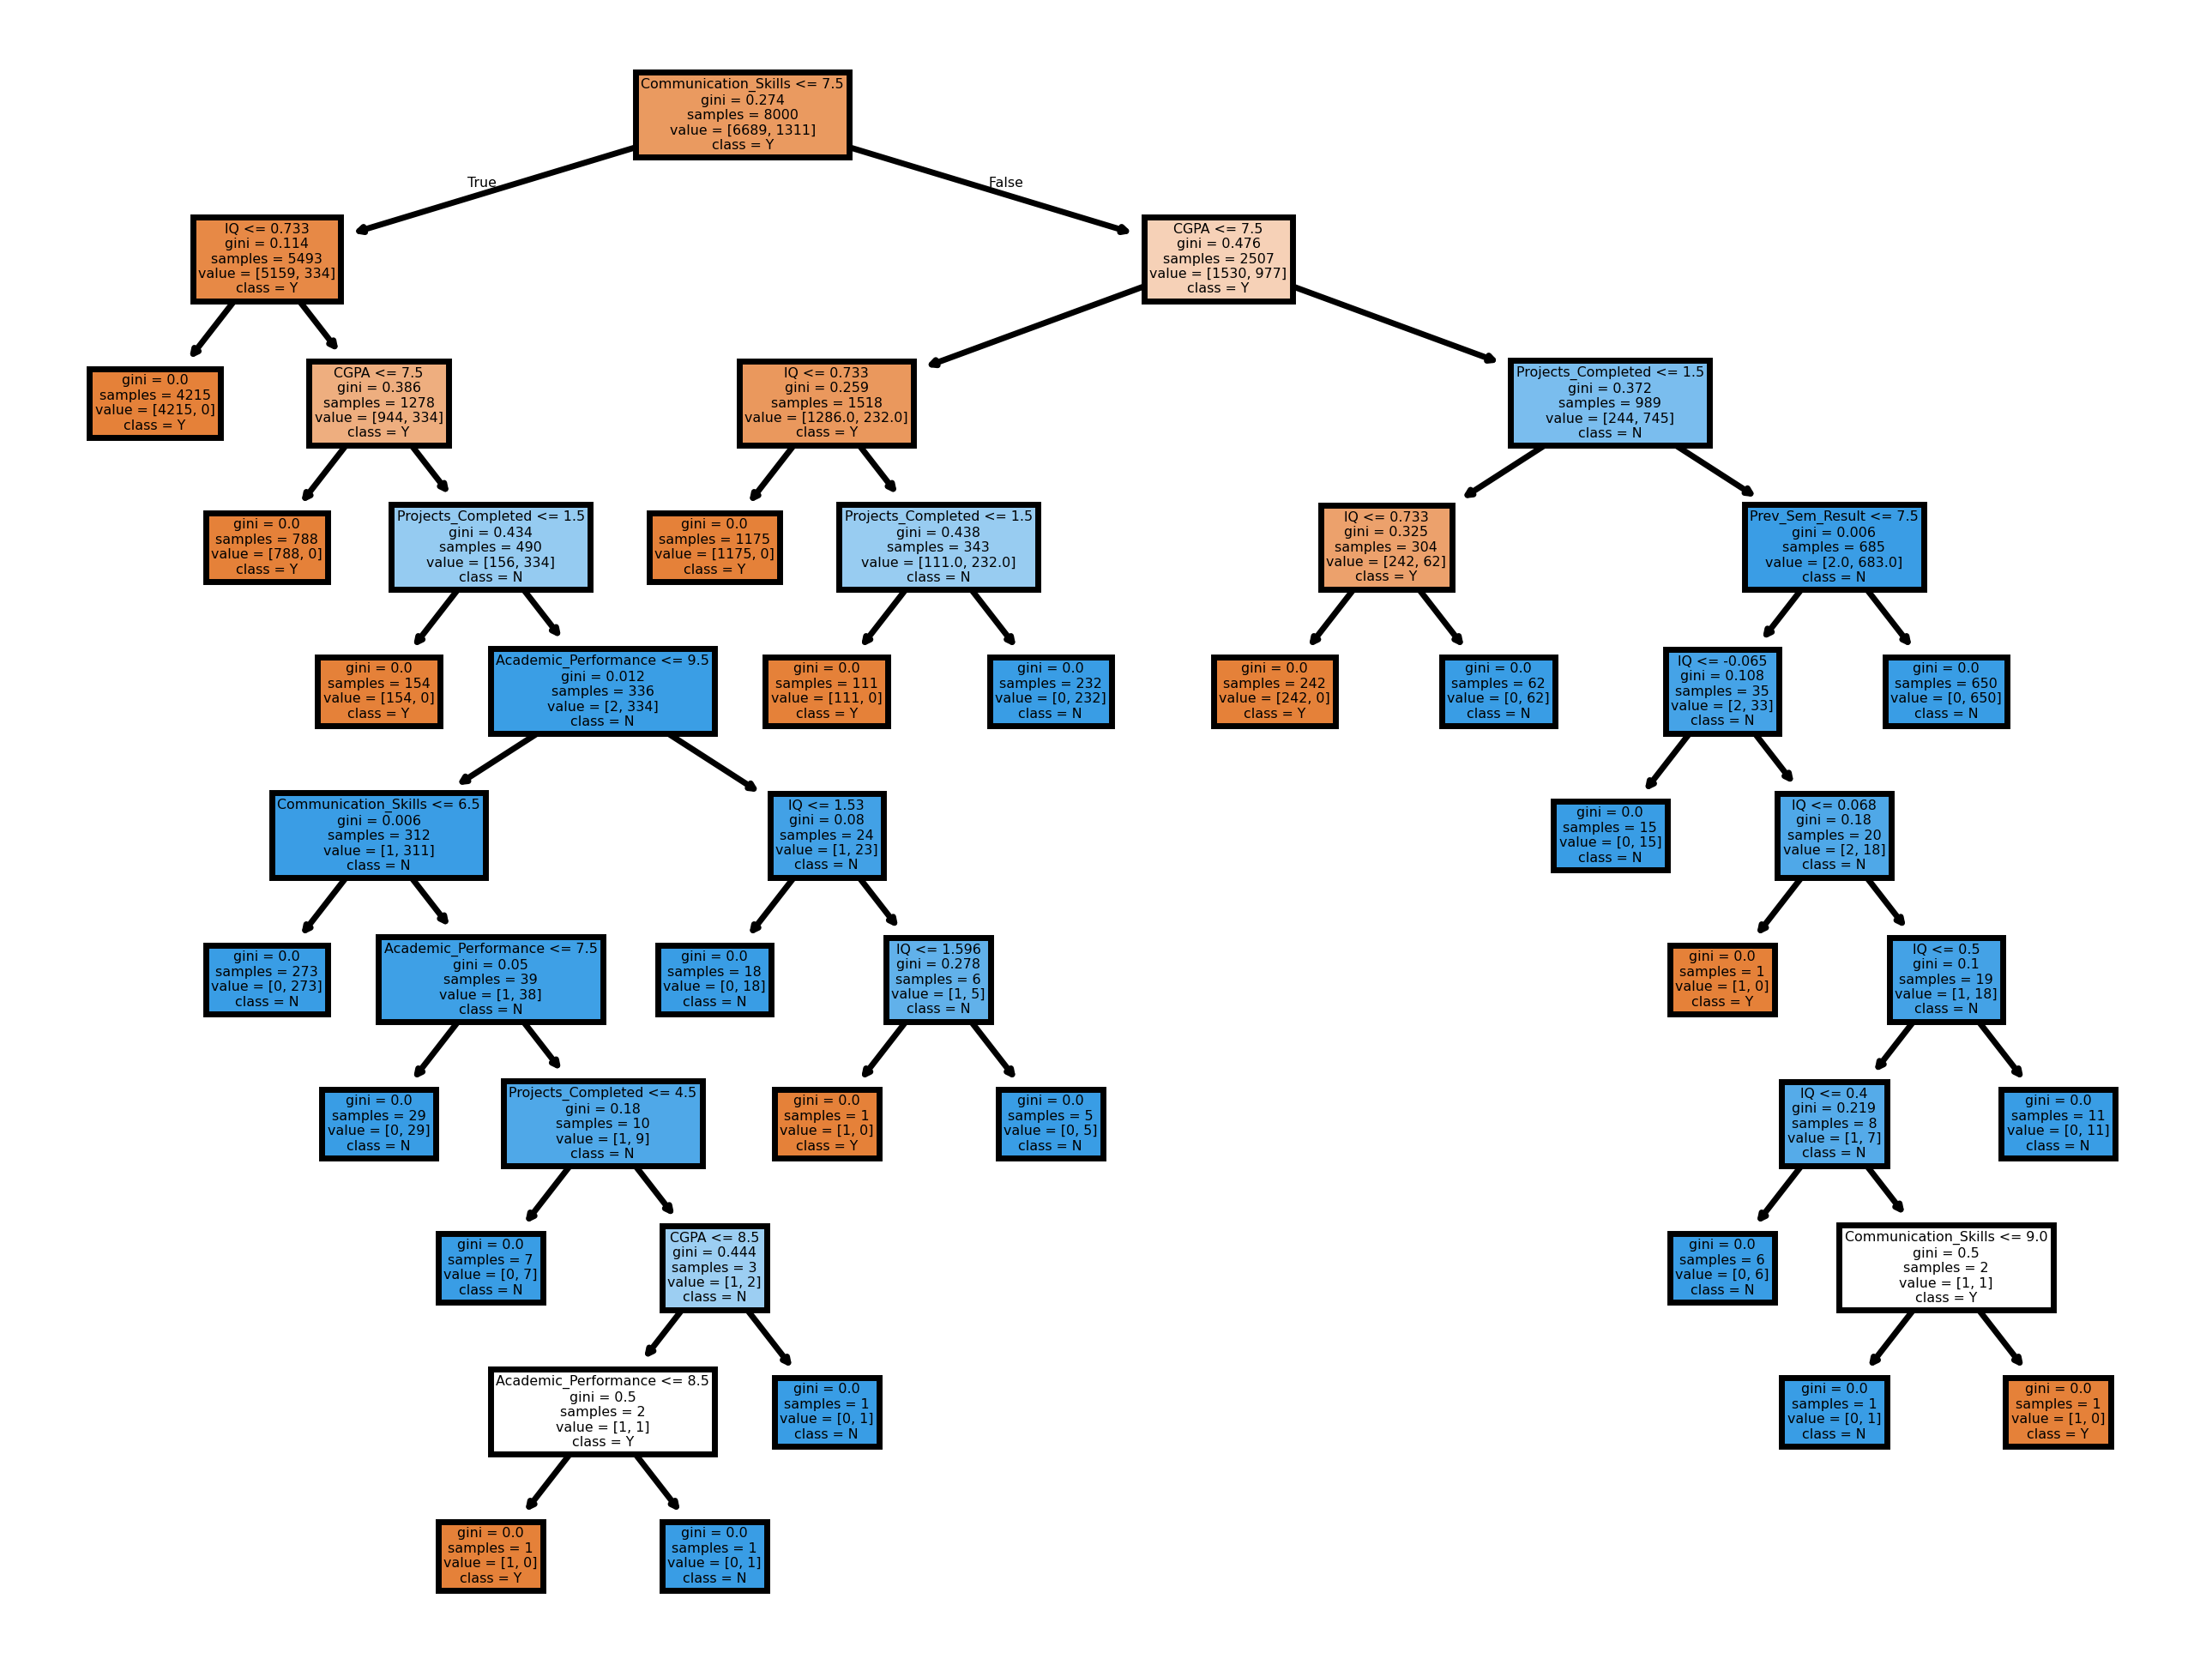

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt=DecisionTreeClassifier(random_state=35)
dt.fit(x_train,y_train)

plt.figure(dpi=500)
plot_tree(dt,filled=True,
          feature_names=['IQ','Prev_Sem_Result','CGPA','Academic_Performance','Communication_Skills','Projects_Completed',
                         'Internship_Experience_Yes','Placement_Yes'],class_names=["Y","N"])
plt.show()

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=70)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,10))}

gd_dt = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gd_dt.fit(x_train,y_train)

gd_dt.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [41]:
gd_dt.best_estimator_.feature_importances_

array([2.17708649e-01, 9.92837881e-05, 3.26183452e-01, 0.00000000e+00,
       1.70481113e-01, 2.85527502e-01, 0.00000000e+00])

In [42]:
feats = pd.DataFrame(data=gd_dt.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=["Feature Importacne"])
feats
feats_im = feats[feats["Feature Importacne"]>0]
imp_features = feats_im.index.to_list()
imp_features

['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills', 'Projects_Completed']

In [43]:
x1=x[imp_features]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,train_size=0.8,random_state=35)
from sklearn.metrics import accuracy_score,classification_report
dt=DecisionTreeClassifier(criterion='gini',max_depth=4)
dt.fit(x1_train,y1_train)
y1pred_train = dt.predict(x1_train)
print("train_accuracy: ",accuracy_score(y1_train,y1pred_train))
print("cross_validation: ",cross_val_score(dt,x1_train,y1_train,cv=5,scoring="accuracy").mean())
y1pred_test = dt.predict(x1_test)
print("test_accuracy: ",accuracy_score(y1_test,y1pred_test))
print("Train:",classification_report(y1_train,y1pred_train))
print("Test:",classification_report(y1_test,y1pred_test))

train_accuracy:  0.9995
cross_validation:  0.9994999999999999
test_accuracy:  0.999
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6689
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      1.00      1.00       348

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# DecisonTreeclassifier was selected as the best model. 
# Maximum test accuracy with less amount of time.